# Plot function reverse engineering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gen_array_lr(n_samples = 20, noise_std = 1,  slope = 2.0, bias = 5):
    arr1 = np.random.uniform(0,10, n_samples)
    arr2 = arr1 *slope + bias + np.random.normal(0, noise_std, n_samples)
    return np.column_stack((arr1, arr2))

In [5]:
def visualize_dataset(dataset, model=None):
    """
    Visualize dataset with optional regression line.
    
    Parameters:
    - dataset: NumPy array with rows [X, y]
    - model: PySpark LinearRegressionModel (optional)
    """
    X = dataset[:, 0]
    y = dataset[:, 1]
    
    plt.scatter(X, y, color="blue", alpha=0.6, label="Data points")
    
    # # If model is provided, plot regression line
    # if model is not None:
    #     y_pred = model.coefficients[0] * X + model.intercept
    #     plt.plot(X, y_pred, color="red", linewidth=2, label=f'Regression Line: y = {model.coefficients[0]:.2f}x + {model.intercept:.2f}')
    #     # plt.plot(X, y_pred, color='red', linewidth=2, 
    #     #      label=f'Regression Line: y = {coefficients[0]:.2f}x + {intercept:.2f}')
    
    plt.xlabel("X (feature)")
    plt.ylabel("y (target)")
    #plt.title("Linear Regression Visualization")
    plt.legend()
    plt.show()

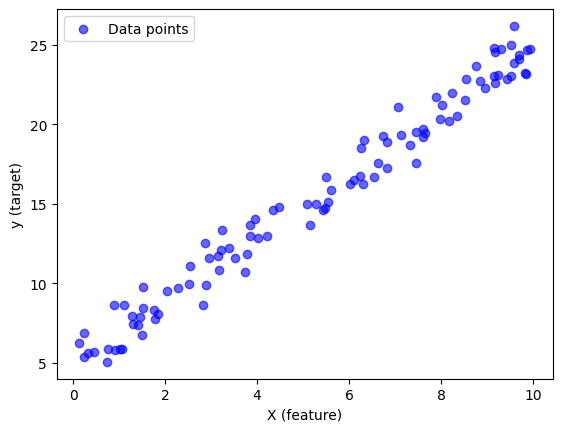

In [6]:
myarr = gen_array_lr(100)
visualize_dataset(myarr)

In [7]:
myarr

array([[ 2.53010626, 11.09820259],
       [ 5.2905073 , 14.96233948],
       [ 8.7508997 , 23.64297171],
       [ 7.97950982, 20.31938415],
       [ 0.89159944,  8.64201261],
       [ 9.68999904, 24.11575691],
       [ 9.14401417, 23.02559351],
       [ 6.62499051, 17.57033557],
       [ 8.84656226, 22.74310239],
       [ 3.16599411, 10.8179381 ],
       [ 3.77030369, 11.80923426],
       [ 7.1389743 , 19.29150047],
       [ 2.86079592, 12.54762453],
       [ 9.87052778, 24.64701453],
       [ 0.13307726,  6.2168292 ],
       [ 1.43981751,  7.88564154],
       [ 9.30420085, 24.7607948 ],
       [ 3.13971832, 11.67946701],
       [ 6.11531584, 16.48536593],
       [ 6.30053317, 16.22316947],
       [ 7.89030586, 21.72322385],
       [ 9.69254289, 24.37851826],
       [ 6.26089058, 18.47660977],
       [ 9.53179767, 23.04857804],
       [ 8.53756361, 22.83179588],
       [ 3.22126224, 12.08673158],
       [ 7.59930271, 19.70053454],
       [ 6.24677971, 16.74611955],
       [ 8.95094721,

In [8]:
myarr[0]

array([ 2.53010626, 11.09820259])

In [11]:
# for i in myarr:
#     print(i[0])
#     print(i[1])

In [12]:
X = myarr[:, 0]

In [14]:
X

array([2.53010626, 5.2905073 , 8.7508997 , 7.97950982, 0.89159944,
       9.68999904, 9.14401417, 6.62499051, 8.84656226, 3.16599411,
       3.77030369, 7.1389743 , 2.86079592, 9.87052778, 0.13307726,
       1.43981751, 9.30420085, 3.13971832, 6.11531584, 6.30053317,
       7.89030586, 9.69254289, 6.26089058, 9.53179767, 8.53756361,
       3.22126224, 7.59930271, 6.24677971, 8.95094721, 5.07650015,
       2.28464426, 9.18444261, 0.24139906, 3.8340276 , 1.75068764,
       5.48057425, 3.23856035, 1.09311107, 9.2311801 , 0.74810332,
       9.94351321, 8.2495285 , 0.89856565, 1.05576803, 6.33047205,
       8.02463478, 5.43913289, 9.81993304, 2.52362773, 0.24016346,
       1.41582693, 9.57736801, 5.50740895, 9.175274  , 6.0240651 ,
       1.48346054, 7.32826966, 4.47341358, 7.60098878, 8.52161044,
       6.82908732, 1.27270001, 2.94310556, 6.73288353, 4.3543137 ,
       5.15687818, 9.43899766, 3.73695691, 0.45294338, 9.53205169,
       4.21395021, 3.39410485, 7.45450752, 7.4489548 , 1.78518

In [16]:
y = myarr[:, 1]

In [17]:
y

array([11.09820259, 14.96233948, 23.64297171, 20.31938415,  8.64201261,
       24.11575691, 23.02559351, 17.57033557, 22.74310239, 10.8179381 ,
       11.80923426, 19.29150047, 12.54762453, 24.64701453,  6.2168292 ,
        7.88564154, 24.7607948 , 11.67946701, 16.48536593, 16.22316947,
       21.72322385, 24.37851826, 18.47660977, 23.04857804, 22.83179588,
       12.08673158, 19.70053454, 16.74611955, 22.2677048 , 14.98094706,
        9.67323605, 24.57472971,  6.84579347, 13.66519977,  8.32178881,
       14.73094702, 13.35307301,  8.62330135, 23.12346663,  5.86191762,
       24.73272084, 21.95539972,  5.8019299 ,  5.86577909, 19.00386045,
       21.20136042, 14.57877533, 23.21222633,  9.92398882,  5.32344349,
        7.37070086, 23.84894347, 16.67182956, 22.59112308, 16.23882255,
        6.71394869, 18.66592314, 14.79963379, 19.21600374, 21.50362031,
       17.27294865,  7.92688263, 11.57693209, 19.25291344, 14.57426574,
       13.67701009, 22.84827641, 10.71893691,  5.67104118, 24.95

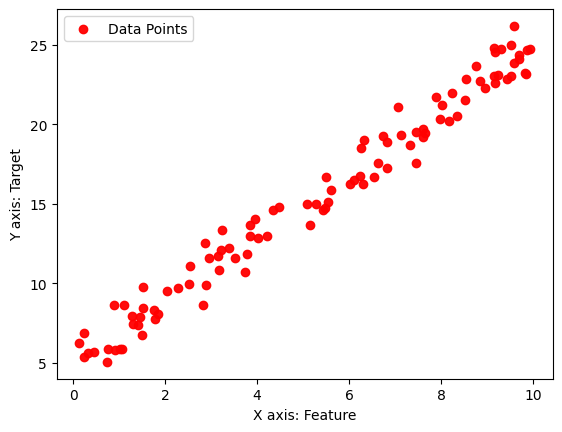

In [44]:
 #plt.scatter(X, y, color="blue", alpha=0.6, label="Data points")
plt.scatter(X, y, color='red', alpha=0.95, label="Data Points")
plt.legend()
plt.xlabel("X axis: Feature")
plt.ylabel("Y axis: Target")
plt.show()

In [45]:
def visualize_data(datset):
    X = datset[:, 0]
    y = datset[:, 1]
    plt.scatter(X, y, color='red', alpha=0.95, label="Data Points")
    plt.legend()
    plt.xlabel("X axis: Feature")
    plt.ylabel("Y axis: Target")
    plt.show()

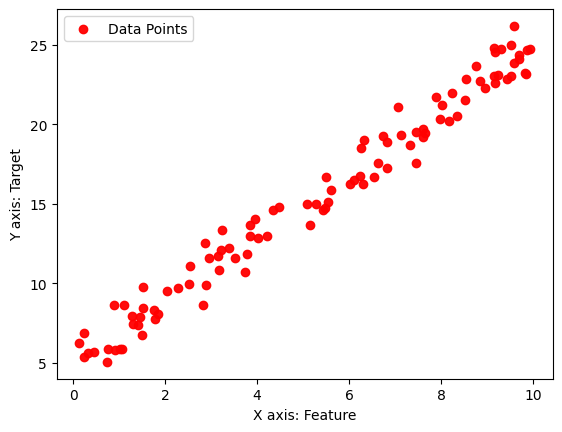

In [46]:
visualize_data(myarr)